# This is the python script to Goal A) of the thesis
It performs some pre-processing steps, shapes the input data, plots the input data in various fashions and tests image enhancement techniques (e.g. filtering using fast-fourier transform, contrast enhancements, different degrees of image blurring). Image blurring usually helps to perform better edge detection results (Goal B).

Connect to google drive for data retrivel and output upload.

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load all required libraries

In [39]:
import numpy as np
import pandas as pd
#from pandas.plotting import table
import cv2 as cv 
#import math
import scipy.stats as stats
from scipy.stats import norm
#import seaborn as sns


from google.colab.patches import cv2_imshow # for image display
from skimage import io
import csv
from PIL import Image 
import matplotlib.pylab as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg 
from matplotlib import colors

from PIL import Image
import urllib.request
import zipfile

In [40]:
#import os
#import sys
#import shutil
#import tarfile

import tensorflow as tf

from scipy.ndimage import rotate

# We'll tell matplotlib to inline any drawn figures like so:

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Plot Available Images (Digital Elevation Model, Hillshades, Orthphoto) with pixel dimension

Plot Image as Hillshade with pixel dimension

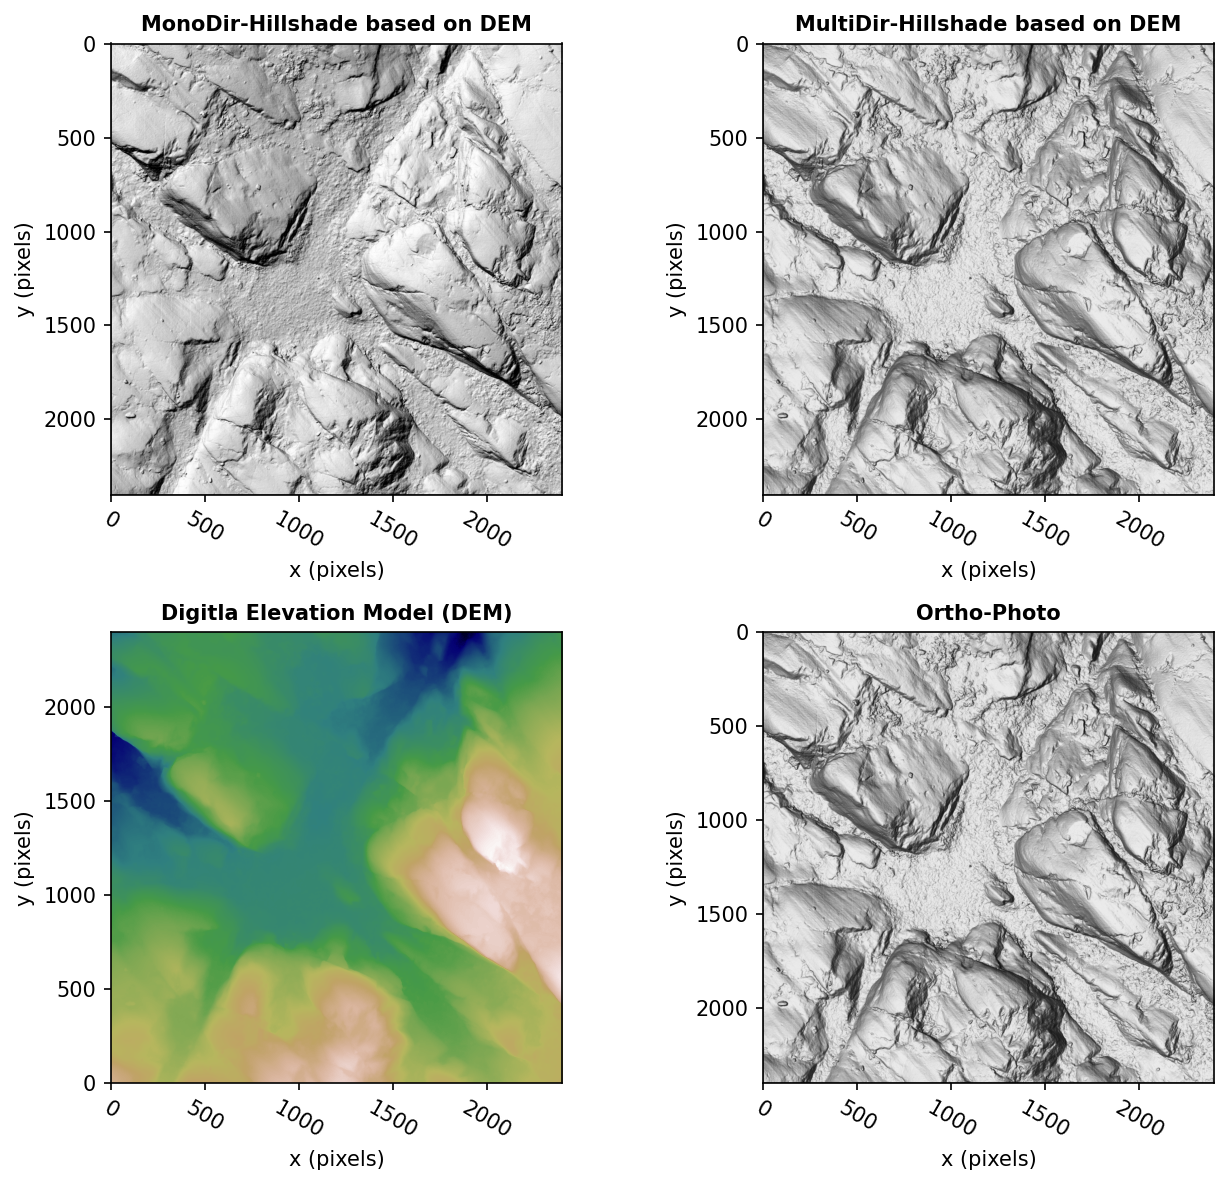

In [41]:
fig=plt.figure(num=None, figsize=(10, 8), dpi=150, facecolor='w', edgecolor='k')

#############
# Hillshade MONO directional

# For GOOGLE DRIVE import
#Hillsh_Mono = mpimg.imread('/content/drive/MyDrive/Final_project_ADS/Hillsh_315_45_1_2400px.tif') # JPEG required, otherwise no color channels. Jpeg = uint8, png = float32 -> Problem
url_hillshade_Mono = 'https://github.com/stfabbri/CAS_ADS_Thesis_final/blob/main/INPUT_FIGURES/Hillsh_315_45_1_2400px.tif?raw=true'

with urllib.request.urlopen(url_hillshade_Mono) as url:
  with open('Hillsh_315_45_1_2400px.tif', 'wb') as f:
    f.write(url.read())

# Assign Name
Hillsh_Mono = mpimg.imread('Hillsh_315_45_1_2400px.tif')


plt.subplot(221), imshow(Hillsh_Mono)
plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)',size=10)
plt.xticks(np.arange(0, 2400+1, step=500),rotation='-30')
plt.yticks(np.arange(0, 2400+1, step=500),rotation='  0')
plt.title('MonoDir-Hillshade based on DEM',size=10,fontweight="bold")
plt.tight_layout()

#############
# Hillshade MULTI directional
# For GOODLE DRIVE import
#Hillsh_Multi = mpimg.imread('/content/drive/MyDrive/Final_project_ADS/Hillsh_Multi_2400px.tif') # JPEG required, otherwise no color channels. Jpeg = uint8, png = float32 -> Problem

url_hillshade_Multi = 'https://github.com/stfabbri/CAS_ADS_Thesis_final/blob/main/INPUT_FIGURES/Hillsh_Multi_2400px.tif?raw=true'
with urllib.request.urlopen(url_hillshade_Multi) as url:
    with open('Hillsh_Multi_2400px.tif', 'wb') as f:
        f.write(url.read())
# Assign Name
Hillsh_Multi = mpimg.imread('Hillsh_Multi_2400px.tif')

plt.subplot(222), imshow(Hillsh_Multi)
plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)',size=10)
plt.xticks(np.arange(0, 2400+1, step=500),rotation='-30')
plt.yticks(np.arange(0, 2400+1, step=500),rotation='  0')
plt.title('MultiDir-Hillshade based on DEM',size=10,fontweight="bold")
plt.tight_layout()

################
# Orthophoto
# For GOOGLE DRIVE import
#Ortho = mpimg.imread('/content/drive/MyDrive/Final_project_ADS/10_Ortho_2400pixels.tif') # JPEG/TIF required, otherwise no color channels. Jpeg = uint8, png = float32 -> Problem

url_Ortho = 'https://github.com/stfabbri/CAS_ADS_Thesis_final/blob/main/INPUT_FIGURES/10_Ortho_2400pixels.tif?raw=true'

with urllib.request.urlopen(url_hillshade_Multi) as url:
    with open('10_Ortho_2400pixels.tif', 'wb') as f:
        f.write(url.read())
# Assign Name
Ortho = mpimg.imread('10_Ortho_2400pixels.tif')

plt.subplot(224), imshow(Ortho)
plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)',size=10)
plt.xticks(np.arange(0, 2400+1, step=500),rotation='-30')
plt.yticks(np.arange(0, 2400+1, step=500),rotation='  0')
plt.title('Ortho-Photo',size=10,fontweight="bold")
plt.tight_layout()

#############
# Digital elevation model (dem)
 
# read the dataset using the compression zip 
#url_dem    = '/content/drive/MyDrive/CSV_tables/DEM_10.csv' #read dem
url_dem = 'https://github.com/stfabbri/CAS_ADS_Thesis_final/blob/main/INPUT_FIGURES/DEM_10.zip?raw=true'
dem = pd.read_csv(url_dem,compression='zip',header=None, delimiter=';', dtype= 'float64')
df_dem = pd.DataFrame(dem)
cmap   = 'gist_earth'

phys_coords = [0, 2400, 0, 2400]
plt.subplot(223), imshow(df_dem,cmap=cmap,extent=phys_coords)

plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)',size=10)
plt.xticks(np.arange(0, 2400+1, step=500),rotation='-30')
plt.yticks(np.arange(0, 2400+1, step=500),rotation='  0')
plt.title('Digitla Elevation Model (DEM)',size=10,fontweight="bold")
plt.tight_layout()

#Display color-coded DEM and superimpose on Hillshade

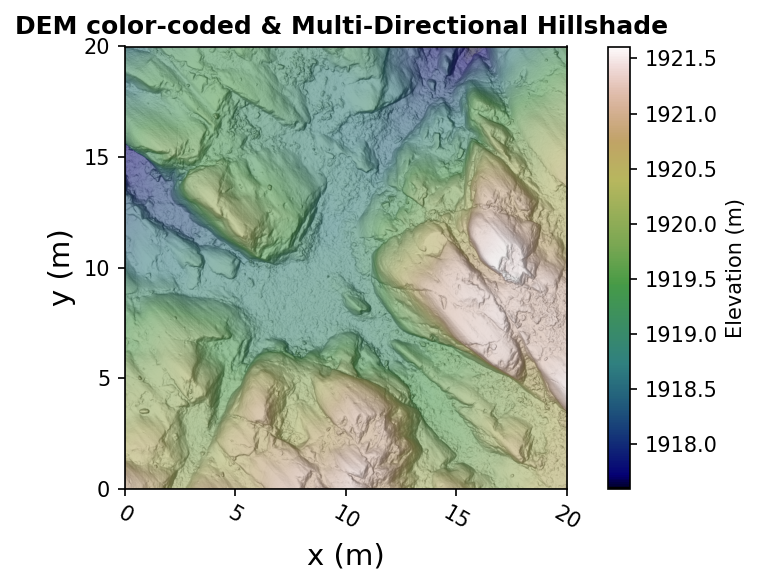

In [42]:
# Hillshade based on Digital elevation model (dem)

from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=150, facecolor='w', edgecolor='k')

x, y     =  np.linspace(0,20,2), np.linspace(0,20,2)
xv, yv   =  np.meshgrid(x, y)

#phys_coords = [2559100, 2559120, 1103065, 1103085]
phys_coords = [0, 20, 0, 20]

plt.imshow(Hillsh_Multi,extent=phys_coords)
plt.imshow(df_dem,alpha=.5,cmap=cmap,extent=phys_coords)

# colorbar
cbar = plt.colorbar(label='Elevation (m)')
cbar.set_alpha(1)
cbar.draw_all()
# labels
plt.xlabel('x (m)',size=14)
plt.ylabel('y (m)',size=14)
plt.xticks(np.arange(0, 20+1, step=5),rotation='-30')
plt.yticks(np.arange(0, 20+1, step=5),rotation='  0')
plt.title('DEM color-coded & Multi-Directional Hillshade ',size=12,fontweight="bold")

plt.tight_layout()

Change Contrast of picture

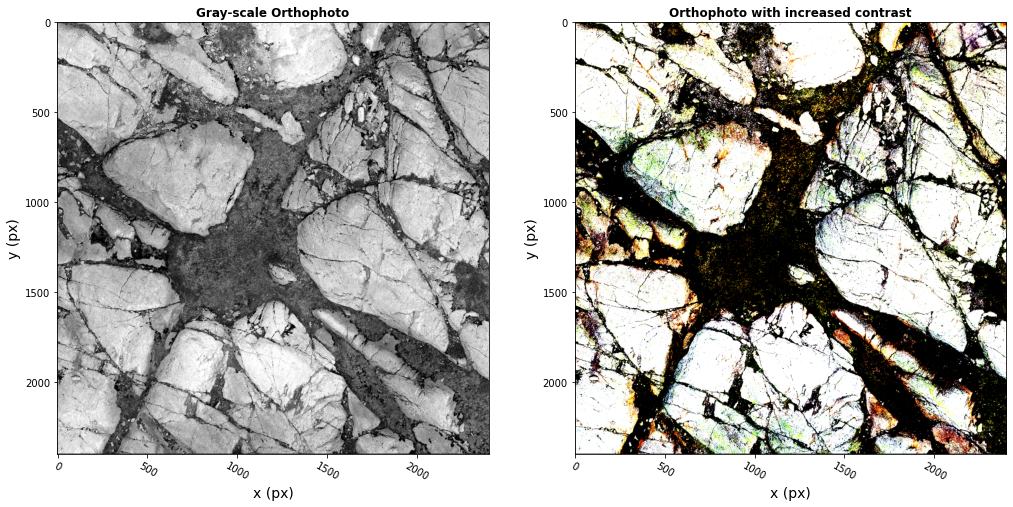

In [43]:
#load image, convert to gray-scale and normalize (Modified from Tutorial IV, Mykhailo Vladymyrov)

#img_raw = plt.imread('/content/drive/MyDrive/Final_project_ADS/Hillsh_Multi_2400px.tif').mean(axis=2)[0:2400, 0:2400].astype(np.float32)

Ortho = plt.imread('/content/drive/MyDrive/Final_project_ADS/10_Ortho_2400pixels.tif').mean(axis=2)[0:2400, 0:2400].astype(np.float32)
img_raw = (Ortho-Ortho.mean())/Ortho.std()

### Modifiy contrst of the image
from PIL import Image, ImageEnhance

#read the image
img = Image.open('/content/drive/MyDrive/Final_project_ADS/10_Ortho_2400pixels.tif')

#image brightness enhancer
enhancer = ImageEnhance.Contrast(img)

#INCREASE CONTRAST
factor = 10.5 
im_output = enhancer.enhance(factor)

# Saves the modified pixels to image 
im_output.save("/content/drive/MyDrive/Final_project_ADS/out.tif") 

f, axs = plt.subplots(2,2,figsize=(17,15))
plt.subplot(1,2,1), plt.imshow(img_raw, cmap='gray')
# labels
plt.xlabel('x (px)',size=14)
plt.ylabel('y (px)',size=14)
plt.xticks(np.arange(0, 2400+1, step=500),rotation='-30')
plt.yticks(np.arange(0, 2400+1, step=500),rotation='  0')
plt.title('Gray-scale Orthophoto',size=12,fontweight="bold")

plt.subplot(1,2,2), plt.imshow(im_output)
# labels
plt.xlabel('x (px)',size=14)
plt.ylabel('y (px)',size=14)
plt.xticks(np.arange(0, 2400+1, step=500),rotation='-30')
plt.yticks(np.arange(0, 2400+1, step=500),rotation='  0')
plt.title('Orthophoto with increased contrast',size=12,fontweight="bold")
plt.grid(False)

In [44]:
# Check the image matrix data type (could know the bit depth of the image)
#testim = mpimg.imread('/content/drive/MyDrive/Final_project_ADS/10_Ortho_2400pixels.tif')

# WITH CONTRAST
ortho_contrast = mpimg.imread('/content/drive/MyDrive/Final_project_ADS/out.tif')
print(ortho_contrast.dtype)
# Check the height of image 
print(ortho_contrast.shape[0])
# Check the width of image 
print(ortho_contrast.shape[1])
# Check the number of channels of the image
print(ortho_contrast.shape[2])

uint8
2400
2400
3


Text(0, 0.5, 'y (pixels)')

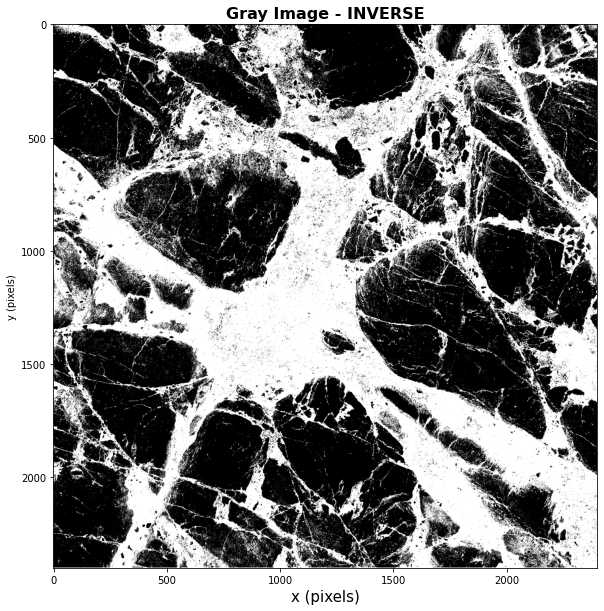

In [45]:
# This is an inverse operation of the grayscale image, you could see that the 
# bright pixels become dark, and the dark pixels become bright
# Gray Image
gray_image_contrast = cv.cvtColor(ortho_contrast, cv.COLOR_BGR2GRAY)

# Inverse Gray Image
inv_gray_contrast = 255 - gray_image_contrast
#fig = plt.figure(figsize=(17,7))
fig = plt.figure(figsize=(10,10))
plt.imshow(inv_gray_contrast, cmap = 'gray')
plt.title('Gray Image - INVERSE',size=16,fontweight="bold")
plt.xlabel('x (pixels)',size=15)
plt.ylabel('y (pixels)', size=10)


## Filtered Image (output FFT)
A fourier transform is used to find the frequency domain of an image. You can consider an image as a signal which is sampled in two directions. So taking a fourier transform in both X and Y directions gives you the frequency representation of image. For the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. Edges and noises are high frequency contents in an image because they change drastically in images.

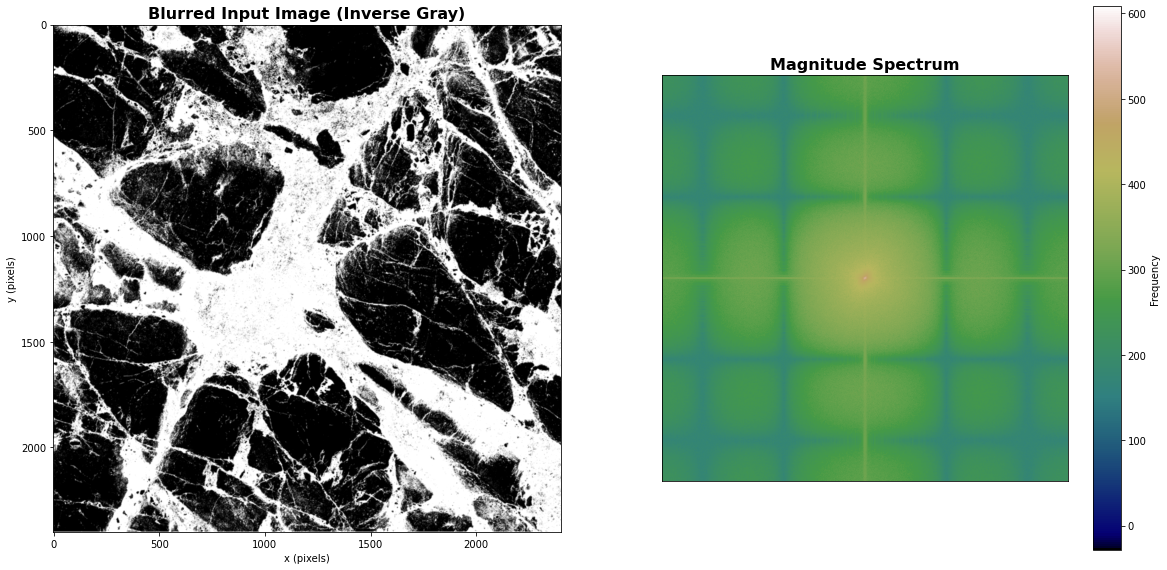

In [46]:
# Blur the inverse-grayscale image by a Guassian filter with kernel size of 10
inv_gray_contrast_imBlur5 = cv.blur(inv_gray_contrast,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(inv_gray_contrast_imBlur5)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

fig = plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(inv_gray_contrast_imBlur5, cmap = 'gray')
plt.title('Blurred Input Image (Inverse Gray)', size=16,fontweight="bold"), 
plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)', size=10)
#plt.gca().invert_yaxis()

# Magintude Spectrum
plt.subplot(122),
plt.imshow(magnitude_spectrum, cmap = 'gist_earth')
# colorbar
cbar = plt.colorbar(label='Frequency')
cbar.draw_all()
plt.title('Magnitude Spectrum', size=16,fontweight="bold"),
plt.xticks([]), plt.yticks([])
plt.show()

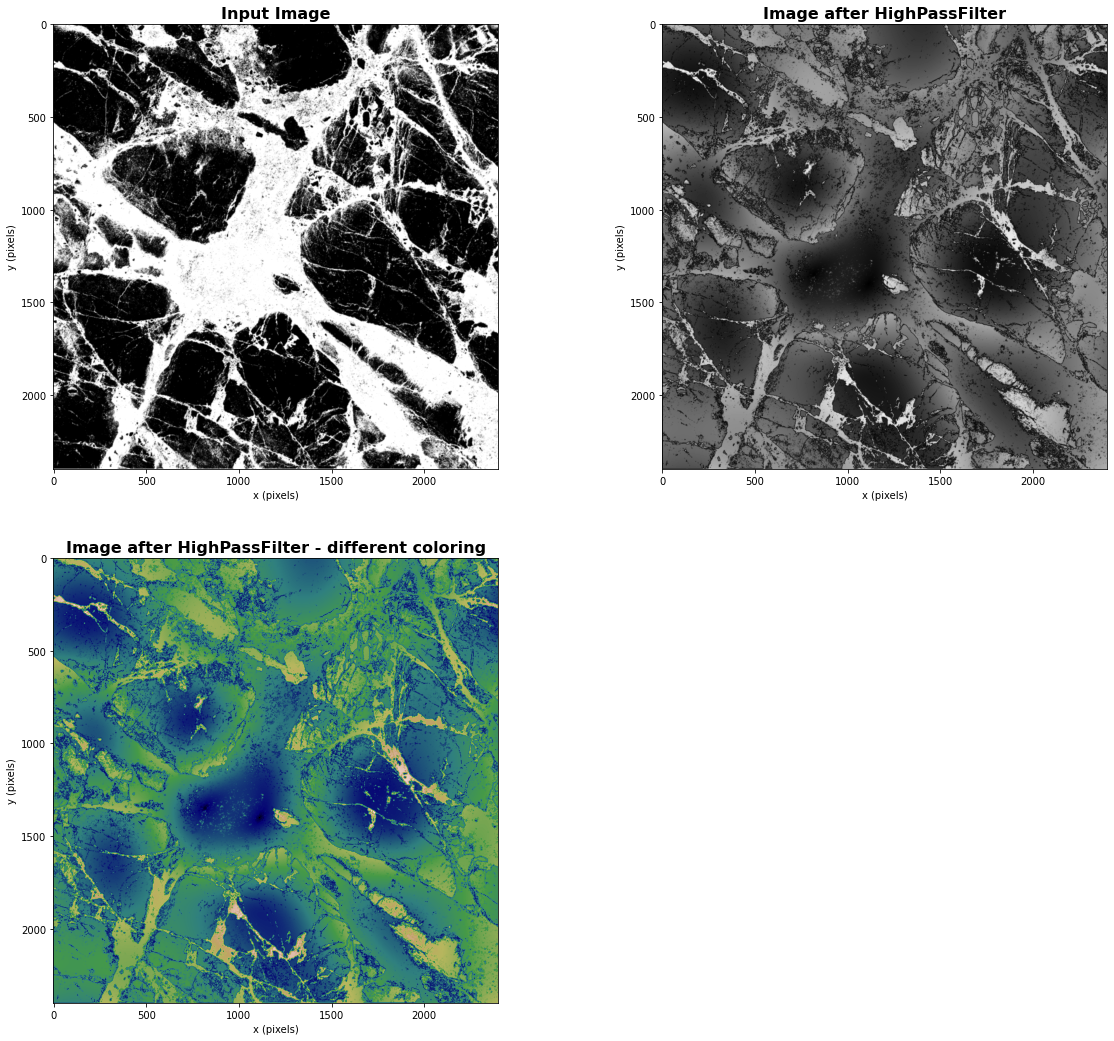

In [47]:
rows, cols = inv_gray_contrast_imBlur5.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-3:crow+3, ccol-3:ccol+3] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 18]))
plt.subplot(221),plt.imshow(inv_gray_contrast_imBlur5, cmap = 'gray')
plt.title('Input Image', size=16,fontweight="bold"),
plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)', size=10)
#plt.gca().invert_yaxis()


# High pass filter in FFT
plt.subplot(222),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HighPassFilter', size=16,fontweight="bold"), 
plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)', size=10)
#plt.gca().invert_yaxis()

# High pass filter in FFT
plt.subplot(223),plt.imshow(img_back, cmap = 'gist_earth')
plt.title('Image after HighPassFilter - different coloring', size=16,fontweight="bold"),
plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)', size=10)
#plt.gca().invert_yaxis()
plt.show()

#plt.savefig("Image_after_HP_Filter.png", dpi=300)

In [48]:
print(inv_gray_contrast_imBlur5.dtype)
# Check the height of image 
print(inv_gray_contrast_imBlur5.shape[0])
# Check the width of image 
print(inv_gray_contrast_imBlur5.shape[1])
# Check the number of channels of the image
#print(img_raw.shape[2])

uint8
2400
2400


## First attempt of edge detection with convolutional model & various filter testing

Text(0, 0.5, 'y (pixels)')

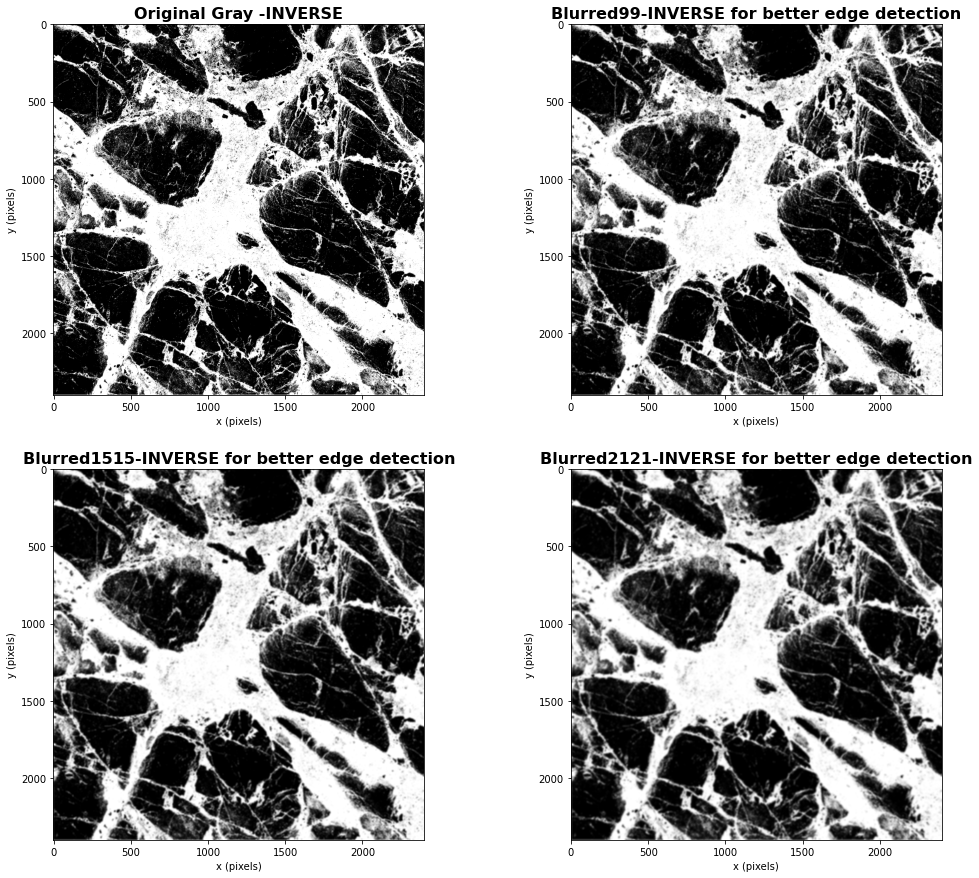

In [49]:
# Blur the inverse gray image for better edge detection
#GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
im_Blur55 = cv.GaussianBlur(inv_gray_contrast,(5,5),5)
im_Blur99 = cv.GaussianBlur(inv_gray_contrast,(9,9),5)
im_Blur1515 = cv.GaussianBlur(inv_gray_contrast,(15,15),5)
im_Blur2121 = cv.GaussianBlur(inv_gray_contrast,(21,21),5)
f, axs = plt.subplots(2,2,figsize=(17,15))

plt.subplot(221),plt.imshow(inv_gray_contrast, cmap = 'gray')
plt.title('Original Gray -INVERSE', size=16,fontweight="bold"),
plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)', size=10)
#plt.gca().invert_yaxis()


plt.subplot(222),plt.imshow(im_Blur99, cmap = 'gray')
plt.title('Blurred99-INVERSE for better edge detection', size=16,fontweight="bold")
plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)', size=10)
#plt.gca().invert_yaxis()

plt.subplot(223),plt.imshow(im_Blur1515, cmap = 'gray')
plt.title('Blurred1515-INVERSE for better edge detection', size=16,fontweight="bold")
plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)', size=10)
#plt.gca().invert_yaxis()

plt.subplot(224),plt.imshow(im_Blur2121, cmap = 'gray')
plt.title('Blurred2121-INVERSE for better edge detection', size=16,fontweight="bold")
plt.xlabel('x (pixels)',size=10)
plt.ylabel('y (pixels)', size=10)
#plt.gca().invert_yaxis()



In [50]:
# Ortho Image blurred
ortho_contrast_Blur55 = cv.GaussianBlur(ortho_contrast,(5,5),5)
ortho_contrast_Blur99 = cv.GaussianBlur(ortho_contrast,(9,9),5)
ortho_contrast_Blur1515 = cv.GaussianBlur(ortho_contrast,(15,15),5)

#plt.savefig("Ortho_Image_Blurred.png", dpi=300)